<a href="https://colab.research.google.com/github/JnLuck/BigData/blob/main/PandasEjercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importar la librería pandas
import pandas as pd

In [ ]:
# Importar la librería matplotlib
import matplotlib.pyplot as plt

In [ ]:
# Leer un archivo CSV desde una URL
df = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vTKv5ve5cbcTUOygS_FEd-swTOTVxC4DldFq-T2W4nPW-XqMYK8rVrMn_RDwf_ujF8o_1YyHAL98OiO/pub?gid=1414694331&single=true&output=csv")

In [ ]:
# Filtrar filas donde el UBIGEO comienza con '21' (correspondiente a la región de Puno)
df_puno_total = df[df['UBIGEO'].astype(str).str.startswith('21')]

# Obtener el número total de registros en toda la región de Puno
total_registros_puno = len(df_puno_total)

# Imprimir el número total de registros en toda la región de Puno
print("Tenemos", total_registros_puno, "registros en total en toda la región de Puno")


Tenemos  7070


(None, 'registro total en todo puno')

In [ ]:
# Filtrar filas de la región de Puno para incluir solo infantes (edades entre 4 y 11 años inclusive)
df_puno_infantes = df_puno_total[(df_puno_total['edad'] >= 4) & (df_puno_total['edad'] <= 11)]

# Filtrar infantes que hablan quechua (idioma_ninez == 1)
df_puno_quechua1 = df_puno_infantes[df_puno_infantes['idioma_ninez'] == 1]

# Filtrar infantes que hablan aymara (idioma_ninez == 2)
df_puno_aymara1 = df_puno_infantes[df_puno_infantes['idioma_ninez'] == 2]

# Imprimir el número de infantes en la región de Puno
print(df_puno_infantes.shape[0])

# Imprimir el número de infantes que hablan quechua en la región de Puno
print(df_puno_quechua1.shape[0])

# Imprimir el número de infantes que hablan aymara en la región de Puno
print(df_puno_aymara1.shape[0])

965
20
8


In [ ]:
# Contar cuántos registros en df_puno_quechua1 y df_puno_aymara1 son niñas (sexo = 2) y niños (sexo = 1)
quechua_niñas = df_puno_quechua1[df_puno_quechua1['sexo'] == 2].shape[0]
quechua_niños = df_puno_quechua1[df_puno_quechua1['sexo'] == 1].shape[0]

# Contar niñas y niños que hablan aymara en la región de Puno
aymara_niñas = df_puno_aymara1[df_puno_aymara1['sexo'] == 2].shape[0]
aymara_niños = df_puno_aymara1[df_puno_aymara1['sexo'] == 1].shape[0]

# Imprimir resultados para niñas y niños que hablan quechua
print("Niños de 4 a 11 años en UBIGEO 210101 (Puno) que hablan quechua:")
print("Niñas que hablan quechua:", quechua_niñas)
print("Niños que hablan quechua:", quechua_niños)
print()

# Imprimir resultados para niñas y niños que hablan aymara
print("Niños de 4 a 11 años en UBIGEO 210101 (Puno) que hablan aimara:")
print("Niñas que hablan aimara:", aymara_niñas)
print("Niños que hablan aimara:", aymara_niños)

Niños de 4 a 11 años en UBIGEO 210101 (Puno) que hablan quechua:
Niñas que hablan quechua: 12
Niños que hablan quechua: 8

Niños de 4 a 11 años en UBIGEO 210101 (Puno) que hablan aimara:
Niñas que hablan aimara: 2
Niños que hablan aimara: 6


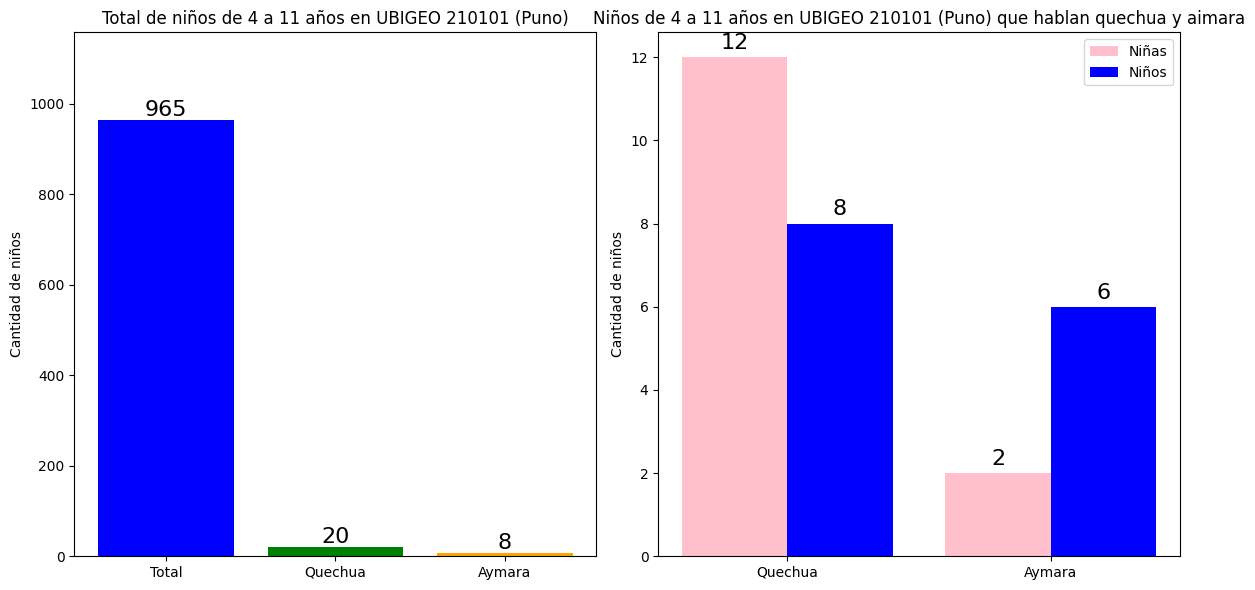

In [ ]:
# Datos
etiquetas = ['Total', 'Quechua', 'Aymara']
valores_total = [df_puno_infantes.shape[0], df_puno_quechua1.shape[0], df_puno_aymara1.shape[0]]
quechua_niñas = 12
quechua_niños = 8
aymara_niñas = 2
aymara_niños = 6
valores_niñas = [quechua_niñas, aymara_niñas]
valores_niños = [quechua_niños, aymara_niños]

# Crear figura y ejes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Grafico para total, quechua y aimara
ax1.bar(etiquetas, valores_total, color=['blue', 'green', 'orange'])
ax1.set_title('Total de niños de 4 a 11 años en UBIGEO 210101 (Puno)')
ax1.set_ylabel('Cantidad de niños')
ax1.set_ylim(0, max(valores_total) * 1.2)
for i, v in enumerate(valores_total):
    ax1.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=16)

# Grafico para niñas y niños que hablan quechua y aimara
ax2.bar([0.8, 1.8], valores_niñas, width=0.4, label='Niñas', color='pink')
ax2.bar([1.2, 2.2], valores_niños, width=0.4, label='Niños', color='blue')
ax2.set_title('Niños de 4 a 11 años en UBIGEO 210101 (Puno) que hablan quechua y aimara')
ax2.set_ylabel('Cantidad de niños')
ax2.set_xticks([1, 2])
ax2.set_xticklabels(['Quechua', 'Aymara'])
ax2.legend()
for i, v in enumerate(valores_niñas):
    ax2.text(i + 0.8, v + 0.1, str(v), ha='center', va='bottom', fontsize=16)
for i, v in enumerate(valores_niños):
    ax2.text(i + 1.2, v + 0.1, str(v), ha='center', va='bottom', fontsize=16)

# Mostrar grafico
plt.tight_layout()
plt.show()